In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns 
from datetime import datetime
from Bokeh_Python_Visualization.bokeh_app.scripts.histogram import histogram_tab
from Bokeh_Python_Visualization.bokeh_app.scripts.density import density_tab
from Bokeh_Python_Visualization.bokeh_app.scripts.table import table_tab

In [196]:
DATA_SET_PATH =  os.path.join(os.getcwd(), "Data") 
#Sail_data
DATA_PARKRAIL_SAIL = os.path.join(DATA_SET_PATH, "parkrail-sale-app.csv")
DATA_PARKRAIL_SAIL_C = os.path.join(DATA_SET_PATH, "parkrail-sale-backend.csv")
#Park_data
DATA_MOBILITY = os.path.join(DATA_SET_PATH, "mobilitat.csv")
DATA_PRICES = os.path.join(DATA_SET_PATH, "dienststellen-gemass-opentransportdataswiss.csv") 

# Station data 
# DATA_STATION = os.path.join(DATA_SET, "mobilitat.csv")
DATA_PASSENGERS = os.path.join(DATA_SET_PATH, "passagierfrequenz.csv")
#City data 
CITY_DATA_1 = os.path.join(DATA_SET_PATH, "T 03.01.010 Bevölkerung nach Erwerbsstatus, Geschlecht, Heimat und Alter basierend auf Strukturerhebung 2016 bis 2018.xlsx") 
CITY_DATA_2 = os.path.join(DATA_SET_PATH,"bern_calander.txt")

## Duration and Periode of using Parkrail 

In [197]:
# df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL, error_bad_lines=False)
df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL,sep=';' ,error_bad_lines=False)
df_park_sail.head()

,start,end,facility_name,created,updated,verified_payment,booking_status,facility_uuid
0,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Rivera-Bironico,2020-04-27T09:29:10+02:00,2020-04-27T09:29:23+02:00,2020-04-27T09:29:18+02:00,INVOICE_SENT,b5744b84-73b1-43ac-8253-b63aebc201ea
1,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Fehraltorf,2020-04-27T09:26:03+02:00,2020-04-27T09:27:19+02:00,2020-04-27T09:26:52+02:00,INVOICE_SENT,d1e19871-8d37-4347-aa2a-a18a9c575efc
2,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,Bonstetten-Wettswil,2020-04-27T09:24:32+02:00,2020-04-27T09:24:46+02:00,2020-04-27T09:24:42+02:00,INVOICE_SENT,c23edf7e-a81e-4be8-bcb1-0a02e67a5fb7
3,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:22:09+02:00,2020-04-27T09:22:42+02:00,2020-04-27T09:22:16+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6
4,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:21:21+02:00,2020-04-27T09:21:41+02:00,2020-04-27T09:21:30+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6


In [198]:
# drop unused data for now 
df_park_sail = df_park_sail.drop(["created", "updated", "verified_payment", "booking_status"], axis = 1)

In [199]:
df_park_sail["facility_name"].value_counts()

Yverdon-les-Bains      14076
Sargans                 9181
Chur                    8745
Horgen                  7759
Lenzburg                7597
                       ...  
Lindenholz (BLS)           1
Därstetten (BLS)           1
Rosshäusern (BLS)          1
Lanzenhäusern (BLS)        1
Schlattingen               1
Name: facility_name, Length: 552, dtype: int64

<AxesSubplot:>

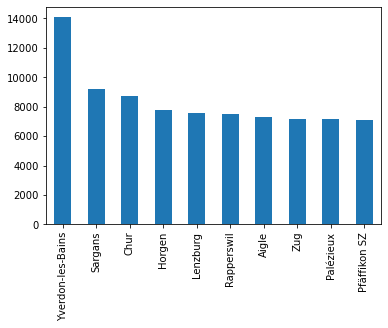

In [200]:
df_park_sail["facility_name"].value_counts().head(10).plot.bar()

In [201]:
# sorting based on station name 
grouped_fname = df_park_sail.groupby("facility_name") 

In [22]:
grouped_fname.describe()

dt                                         \
                               count       mean        std  min   25%   50%   
facility_name                                                                 
Aadorf                         753.0  23.916335  11.378388  1.0  24.0  24.0   
Aarberg                        165.0  12.763636  12.736011  1.0   3.0   8.0   
Aarburg-Oftringen              405.0  24.953086  16.710857  1.0  24.0  24.0   
Aathal                         304.0  19.934211  23.170674  1.0   4.0  24.0   
Aefligen (BLS)                   4.0  14.500000  10.969655  5.0   5.0  14.5   
...                              ...        ...        ...  ...   ...   ...   
Zwingen                        285.0  26.459649  20.954577  1.0  24.0  24.0   
Zäziwil                        162.0  23.320988   9.740518  1.0  24.0  24.0   
Zürich Altstetten / Westlink    98.0  11.663265  14.282816  1.0   2.0   5.0   
Zürich Seebach                 676.0  59.545858  53.638372  1.0  24.0  24.0   
Zürich Tiefenbrunnen          5859.0  14.727769  13.271882  1.0   3.0  16.0   

                                           
                               75%    max  
facility_name                              
Aadorf                        24.0  168.0  
Aarberg                       24.0   77.0  
Aarburg-Oftringen             24.0  168.0  
Aathal                        24.0  167.0  
Aefligen (BLS)                24.0   24.0  
...                            ...    ...  
Zwingen                       24.0  168.0  
Zäziwil                       24.0   78.0  
Zürich Altstetten / Westlink  24.0   97.0  
Zürich Seebach                96.0  169.0  
Zürich Tiefenbrunnen          24.0  168.0  

[552 rows x 8 columns]

# Use Case  (City of Bern)

## 1. Select a Park/Trail Parking space
     a. select a show case city / train station with the largest parking occupancy / train schedule and destinations 
     b. extract the city / neighbrhood information (population / official vacation days / Demographic information )
     c. Weather data / traffic inforamtion
## 2. Data transformation / cleaning and Features extraction 
## 3. using a simple regression model to predict 
    * Predict occupancy of the parking space 
    * Predict occupancy and vacant rate per hour 


### 1. Select a Park/Trail Parking space

In [49]:
df_park_places = pd.read_csv(DATA_MOBILITY,sep=';' ,error_bad_lines=False).fillna(0)
df_park_places_r = pd.DataFrame({"stationsbezeichnung" : df_park_places["stationsbezeichnung"],
                                 "Name Haltestelle" : df_park_places["Name Haltestelle"],
                                "parkrail_anzahl": df_park_places["parkrail_anzahl"]})

In [50]:
df_park_places_r.loc[df_park_places_r["parkrail_anzahl"].argmax()]

stationsbezeichnung    Bern
Name Haltestelle       Bern
parkrail_anzahl         500
Name: 747, dtype: object

In [51]:
# selecte all the parkrail in the city of bern 
df_park_sail_raw = pd.read_csv(DATA_PARKRAIL_SAIL,sep=';' ,error_bad_lines=False)
df_park_sail = df_park_sail_raw.drop(["created", "updated", "verified_payment", "booking_status"], axis = 1)
df_park_sail["start"] = df_park_sail['start'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["end"] = df_park_sail['end'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["dt"] = (df_park_sail["end"] - df_park_sail["start"]) / pd.Timedelta(hours=1)
df_park_sail

,start,end,facility_name,facility_uuid,dt
0,2020-04-27 09:30:00,2020-04-28 09:30:00,Rivera-Bironico,b5744b84-73b1-43ac-8253-b63aebc201ea,24.0
1,2020-04-27 09:30:00,2020-04-28 09:30:00,Fehraltorf,d1e19871-8d37-4347-aa2a-a18a9c575efc,24.0
2,2020-04-27 09:25:00,2020-04-28 09:25:00,Bonstetten-Wettswil,c23edf7e-a81e-4be8-bcb1-0a02e67a5fb7,24.0
3,2020-04-27 09:25:00,2020-04-28 09:25:00,St. Gallen St. Fiden,357be87f-ed9b-4aa2-90fd-1854158172d6,24.0
4,2020-04-27 09:25:00,2020-04-28 09:25:00,St. Gallen St. Fiden,357be87f-ed9b-4aa2-90fd-1854158172d6,24.0
...,...,...,...,...,...
451956,2021-01-16 09:05:00,2021-01-17 21:05:00,Walenstadt,36408746-88fd-4bc2-bbe4-5bbc5843e189,36.0
451957,2021-01-16 10:00:00,2021-01-16 19:00:00,La Chaux-de-Fonds,8b1841ab-0395-46f8-920d-c9b1a044c4e1,9.0
451958,2021-01-16 08:50:00,2021-01-17 08:50:00,Aigle,80b76b2c-d28a-4721-88e2-4b7cde553489,24.0
451959,2021-01-16 08:40:00,2021-01-17 08:40:00,Chavornay,5b02a08a-85c4-4d9a-b043-b3f431d12947,24.0


In [202]:
# facility_uuid_bern = df_sail_bern_sbb["facility_uuid"][0]
facility_uuid_bern  = "7d38d0fa-5559-4083-9565-b4457a106478"

In [ ]:
## 2. Data transformation / cleaning and Features extraction

In [53]:
df_park_sail_C_raw = pd.read_csv(DATA_PARKRAIL_SAIL_C,sep=';' ,error_bad_lines=False)
df_park_sail_C = df_park_sail_C_raw.drop(["didok_id", "sales_channel", "created_at", "BPUIC" , "geopos"], axis = 1)
df_park_sail_C = df_park_sail_C.rename(columns={"parking_facility_uuid" : "facility_uuid",
                                    "Name Haltestelle" : "facility_name"})

column_names = ["start","end","facility_name","facility_uuid","dt"]
df_park_sail_C = df_park_sail_C.reindex(columns=column_names)
df_park_sail_C["start"] = df_park_sail_C['start'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail_C["end"] = df_park_sail_C['end'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail_C["dt"] = (df_park_sail_C["end"] - df_park_sail_C["start"]) / pd.Timedelta(hours=1)
df_park_sail_C

,start,end,facility_name,facility_uuid,dt
0,2020-01-25 01:00:00,2020-02-25 01:00:00,Münsingen,0aca6999-d48d-4c64-af07-90e22fedf367,744.0
1,2020-02-05 01:00:00,2021-02-05 01:00:00,Dübendorf,a2fa6e70-be34-45bd-a5f3-ca0eced8f6c2,8784.0
2,2020-02-05 01:00:00,2020-03-05 01:00:00,Fehraltorf,d1e19871-8d37-4347-aa2a-a18a9c575efc,696.0
3,2020-02-05 01:00:00,2020-03-05 01:00:00,Porrentruy,3aa9e036-53d2-4a5d-8af4-02cc51804119,696.0
4,2020-02-06 01:00:00,2020-03-06 01:00:00,Andelfingen,36dec172-4905-45dc-886b-fd0ea0deaaca,696.0
...,...,...,...,...,...
40470,2020-08-31 02:00:00,2020-09-01 02:00:00,Bad Ragaz,1c29f640-b703-43bd-95e8-36ae28263ef1,24.0
40471,2020-08-31 02:00:00,2020-09-06 02:00:00,Delémont,91301b92-be54-4a45-a463-5d1a9cc22b71,144.0
40472,2020-08-29 02:00:00,2020-08-30 02:00:00,Giubiasco,d4fd6d5a-a59a-4282-aed4-31d5aff17a91,24.0
40473,2020-07-23 02:00:00,2020-07-26 02:00:00,Maienfeld,6a2980a2-4d63-4539-8f02-a240a2d1544f,72.0


In [54]:
df_sail_bern_sbb =  df_park_sail.loc[df_park_sail['facility_uuid'] == facility_uuid_bern]
df_sail_bern_other =  df_park_sail_C.loc[df_park_sail_C['facility_uuid'] == facility_uuid_bern]

In [122]:
facility_name = "Bern Bümpliz Süd"
df_sail_merge = pd.concat([df_sail_bern_sbb, df_sail_bern_other])
df_sail_sorted = df_sail_merge.sort_values(by="start")
df_sail_sorted = df_sail_sorted.drop(["facility_uuid", "facility_name"], axis=1)
# df_sail_sorted.reset_index(inplace=True)
df_sail_sorted

,start,end,dt
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0
...,...,...,...
138273,2021-02-21 14:25:00,2021-02-27 14:25:00,144.0
58394,2021-02-21 20:05:00,2021-02-22 20:05:00,24.0
152701,2021-02-22 07:55:00,2021-02-23 07:55:00,24.0
152653,2021-02-22 08:10:00,2021-02-23 08:10:00,24.0


In [132]:
def count_sale(df,state="start",mode="month"):
    res_dict = dict()
    if mode == "month": 
        t = list(df[state].groupby([df[state].dt.month]))
        for i in range(len(t)):
            for id in t[i][1].index:
                res_dict[id] = len(t[i][1])
    if mode == "day" :
        t = list(df[state].groupby([df[state].dt.month,df[state].dt.day]))
        for i in range(len(t)):
            for id in t[i][1].index:
                res_dict[id] = len(t[i][1])
    if mode == "hour" :
        t = list(df[state].groupby([df[state].dt.month, df[state].dt.day, df[state].dt.hour]))
        for i in range(len(t)):
            for id in t[i][1].index:
                res_dict[id] = len(t[i][1])
    return res_dict

{266325: 2,
 82334: 2,
 99835: 3,
 99650: 3,
 35633: 3,
 62875: 2,
 82037: 2,
 337156: 7,
 253592: 7,
 81797: 7,
 309024: 7,
 98675: 7,
 308877: 7,
 308610: 7,
 248513: 15,
 174702: 15,
 81266: 15,
 35333: 15,
 35330: 15,
 97625: 15,
 308172: 15,
 265058: 15,
 308157: 15,
 308151: 15,
 80981: 15,
 35181: 15,
 308034: 15,
 97075: 15,
 263991: 15,
 2827: 20,
 99968: 20,
 248206: 20,
 407313: 20,
 49979: 20,
 247914: 20,
 407187: 20,
 407179: 20,
 49829: 20,
 247430: 20,
 173755: 20,
 49705: 20,
 80650: 20,
 263892: 20,
 35093: 20,
 96705: 20,
 96550: 20,
 35027: 20,
 35248: 20,
 23043: 20,
 97773: 15,
 173070: 15,
 97023: 15,
 96983: 15,
 172764: 15,
 406635: 15,
 189056: 15,
 155460: 15,
 188825: 15,
 127885: 15,
 155379: 15,
 80367: 15,
 412185: 15,
 412177: 15,
 127580: 15,
 49201: 17,
 95513: 17,
 172099: 17,
 95073: 17,
 94838: 17,
 406277: 17,
 94423: 17,
 94173: 17,
 171380: 17,
 127544: 17,
 188325: 17,
 22756: 17,
 411975: 17,
 127628: 17,
 187981: 17,
 127064: 17,
 127048: 17,


In [133]:
# Calculate the occupent parking slots  of according to the booking start 
res_1 = count_sale(df_sail_sorted,state="start",mode="month")
res_2 = count_sale(df_sail_sorted,state="start",mode="day")
res_3 = count_sale(df_sail_sorted,state="start",mode="hour")

df_sail_sorted["monthly_ocupancy"] = df_sail_sorted.index.map(res_1)
df_sail_sorted["daily_ocupancy"] = df_sail_sorted.index.map(res_2)
df_sail_sorted["hourly_ocupancy"] = df_sail_sorted.index.map(res_3)
df_sail_sorted

,start,end,dt,monthly_ocupancy,daily_ocupancy,hourly_ocupancy
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0,260,2,1
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0,260,7,4
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0,260,7,2
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0,260,15,2
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0,260,15,1
...,...,...,...,...,...,...
138273,2021-02-21 14:25:00,2021-02-27 14:25:00,144.0,219,6,1
58394,2021-02-21 20:05:00,2021-02-22 20:05:00,24.0,219,6,1
152701,2021-02-22 07:55:00,2021-02-23 07:55:00,24.0,219,6,1
152653,2021-02-22 08:10:00,2021-02-23 08:10:00,24.0,219,6,3


In [137]:
# Calculte the vacant parking slots according the booking end
res_11 = count_sale(df_sail_sorted,state="end",mode="month")
res_22 = count_sale(df_sail_sorted,state="end",mode="day")
res_33 = count_sale(df_sail_sorted,state="end",mode="hour")

df_sail_sorted["monthly_vacant"] = df_sail_sorted.index.map(res_11)
df_sail_sorted["daily_vacant"] = df_sail_sorted.index.map(res_22)
df_sail_sorted["hourly_vacant"] = df_sail_sorted.index.map(res_33)

df_sail_sorted

,start,end,dt,monthly_ocupancy,daily_ocupancy,hourly_ocupancy,monthly_vacant,daily_vacant,hourly_vacant
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0,260,2,1,255,4,1
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0,260,7,4,255,8,2
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0,260,7,2,255,8,2
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0,260,15,2,255,8,1
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0,260,15,1,255,17,1
...,...,...,...,...,...,...,...,...,...
138273,2021-02-21 14:25:00,2021-02-27 14:25:00,144.0,219,6,1,224,7,1
58394,2021-02-21 20:05:00,2021-02-22 20:05:00,24.0,219,6,1,224,6,1
152701,2021-02-22 07:55:00,2021-02-23 07:55:00,24.0,219,6,1,224,5,1
152653,2021-02-22 08:10:00,2021-02-23 08:10:00,24.0,219,6,3,224,5,3


In [170]:
df_sail_sorted["hourly_freq"] = df_sail_sorted["hourly_ocupancy"] - df_sail_sorted["hourly_vacant"]
df_sail_sorted["daily_freq"] = df_sail_sorted["daily_ocupancy"] - df_sail_sorted["daily_vacant"]
df_sail_sorted["date_only"] =  df_sail_sorted["start"].dt.date
df_sail_sorted.head(20)

,start,end,dt,monthly_ocupancy,daily_ocupancy,hourly_ocupancy,monthly_vacant,daily_vacant,hourly_vacant,hourly_freq,daily_freq,holiday_score,date_only
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0,260,2,1,255,4,1,0,-2,NaN,2020-01-03
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0,260,7,4,255,8,2,2,-1,NaN,2020-01-04
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0,260,7,2,255,8,2,0,-1,NaN,2020-01-04
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0,260,15,2,255,8,1,1,7,NaN,2020-01-05
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0,260,15,1,255,17,1,0,-2,NaN,2020-01-05
2827,2020-01-06 01:00:00,2020-02-06 01:00:00,744.0,260,20,1,224,10,1,0,10,2,2020-01-06
99968,2020-01-06 07:20:00,2020-01-07 07:20:00,24.0,260,20,7,255,13,4,3,7,2,2020-01-06
248206,2020-01-06 07:30:00,2020-01-10 22:30:00,111.0,260,20,7,255,10,1,6,10,2,2020-01-06
407313,2020-01-06 07:35:00,2020-01-07 07:35:00,24.0,260,20,7,255,13,4,3,7,2,2020-01-06
49979,2020-01-06 08:00:00,2020-01-07 08:00:00,24.0,260,20,7,255,13,5,2,7,2,2020-01-06


In [180]:
# City event/ holiday calendar 
df_city_calendar = pd.read_csv(CITY_DATA_2, delimiter = "\t",  header=None, names=["date", "day", "Feiertag", "KW", "klasse"]).dropna()
df_city_calendar
df_city_calendar_short = df_city_calendar.drop(["day", "Feiertag", "KW"], axis=1)
df_city_calendar_short['date'] = pd.to_datetime(df_city_calendar_short['date']).dt.date
df_city_calendar_short

,date,klasse
0,2020-01-01,2
1,2020-02-01,2
3,2020-02-14,5
5,2020-03-29,5
7,2020-05-04,5
...,...,...
95,2021-12-19,5
96,2021-12-24,5
97,2021-12-25,2
98,2021-12-26,2


In [191]:
mapping = dict(df_city_calendar_short[['date', "klasse"]].values)
df_sail_sorted["holiday_score"] = df_sail_sorted["date_only"].map(mapping).fillna(0)
df_sail_sorted

,start,end,dt,monthly_ocupancy,daily_ocupancy,hourly_ocupancy,monthly_vacant,daily_vacant,hourly_vacant,hourly_freq,daily_freq,holiday_score,date_only
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0,260,2,1,255,4,1,0,-2,0,2020-01-03
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0,260,7,4,255,8,2,2,-1,0,2020-01-04
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0,260,7,2,255,8,2,0,-1,0,2020-01-04
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0,260,15,2,255,8,1,1,7,0,2020-01-05
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0,260,15,1,255,17,1,0,-2,0,2020-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138273,2021-02-21 14:25:00,2021-02-27 14:25:00,144.0,219,6,1,224,7,1,0,-1,0,2021-02-21
58394,2021-02-21 20:05:00,2021-02-22 20:05:00,24.0,219,6,1,224,6,1,0,0,0,2021-02-21
152701,2021-02-22 07:55:00,2021-02-23 07:55:00,24.0,219,6,1,224,5,1,0,1,0,2021-02-22
152653,2021-02-22 08:10:00,2021-02-23 08:10:00,24.0,219,6,3,224,5,3,0,1,0,2021-02-22


In [192]:
## # Stations Information in the city of Bern
df_mobility = pd.read_csv(DATA_MOBILITY ,sep=';' ,error_bad_lines=False).fillna(0)
df_park_info = pd.DataFrame({"stationsbezeichnung" : df_mobility["stationsbezeichnung"],
                                "parkrail_anzahl" : df_mobility["parkrail_anzahl"],
                                "parkrail_preis_tag": df_mobility["parkrail_preis_tag"],
                                "parkrail_preis_monat": df_mobility["parkrail_preis_monat"],
                                "parkrail_preis_jahr": df_mobility["parkrail_preis_jahr"],
                                "parkrail_pflichtig_zeit1": df_mobility["parkrail_pflichtig_zeit1"],
                                "Name Haltestelle": df_mobility["Name Haltestelle"]})
df_park_info

,stationsbezeichnung,parkrail_anzahl,parkrail_preis_tag,parkrail_preis_monat,parkrail_preis_jahr,parkrail_pflichtig_zeit1,Name Haltestelle
0,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
1,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
2,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
3,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
4,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
...,...,...,...,...,...,...,...
827,Buchrain,0.0,0.0,0.0,0.0,0,Buchrain
828,Baldegg Kloster,0.0,0.0,0.0,0.0,0,Baldegg Kloster
829,Kerzers Papiliorama,0.0,0.0,0.0,0.0,0,Kerzers Papiliorama
830,Pratteln Salina Raurica,0.0,0.0,0.0,0.0,0,Pratteln Salina Raurica


In [193]:
df_park_info_bern = df_park_info[(df_park_info['stationsbezeichnung'].isin(["Bern", "Bern Wankdorf", "Bern Europaplatz", "Bern Wankdorf", "Bern Bümpliz Süd"]))]
df_park_info_bern

,stationsbezeichnung,parkrail_anzahl,parkrail_preis_tag,parkrail_preis_monat,parkrail_preis_jahr,parkrail_pflichtig_zeit1,Name Haltestelle
495,Bern Bümpliz Süd,32.0,6.0,60.0,600.0,00.00 - 24.00,Bern Bümpliz Süd
496,Bern Europaplatz,0.0,0.0,0.0,0.0,0,Bern Europaplatz
747,Bern,500.0,0.0,0.0,0.0,00.00 - 24.00,Bern
819,Bern Wankdorf,8.0,10.0,0.0,0.0,00.00 - 24.00,Bern Wankdorf
820,Bern Wankdorf,8.0,10.0,0.0,0.0,00.00 - 24.00,Bern Wankdorf


In [188]:
# save csv for visulaization in bokeh dashboard
TO_PATH = os.path.join(os.getcwd(), "Bokeh-Python-Visualization" , "bokeh_app", "data") 
df_sail_sorted.to_csv(os.path.join(TO_PATH, "bern_park.csv"),index=False)
df_data_set = df_sail_sorted

## 3. Building a prediction model that forcast the occupancy of the parking stat 
1. Split the data to training and validation 
2. define the regression model / fit / predict
3. check metric /score

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Trainig data 
training_set = list(df_data_set["date_only"].groupby([df["date_only"].dt.month,df["date_only"].dt.day]))
# Validation data    

